# IT 469 - Phase 1 (Code)
### Group #3 - Topic Detection
<B>Student Names:</B> Amal - Haifa - Reem - Waad

### Installing Packages and Importing Libraries  

In [1]:
#!python3 -m pip install --upgrade pip

In [2]:
#!python3 -m pip install gensim spacy nltk

In [3]:
#!python3 -m pip install -U spacy

In [4]:
#!python3 -m pip install --upgrade gensim

In [5]:
import os
import io
import re
#spacy and genism must be installed before
import spacy
import gensim
import string
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Our Definded Functions
<b>1-</b> extract(path) --> a function used to extract files from a specified directory and store the files in a list. We use this function to concat all the files of the data 
<br><br>
<b>2-</b> clean(text) --> a function used to clean the text passed to it.
<br><br>
<b>3-</b> WriteToFile(path,textfile) --> a function used to store the text to .txt files in a specified directory. We use this function to save the cleaned to text to .txt files, then we pass the .txt files to MadaMira in the terminal.
<br><br>
<b>4-</b> ReadFromFile(path) --> a function used to read the text files from the specified directory. We use this function to read the files after we passed it to MadaMira and store them into variables, to be used later in the models. 

In [6]:
# 1

#returns the names of the files in the directory data as a list
def extract(path):  
    list_of_files = os.listdir(path)
    list1=[]
    for file in list_of_files:
        x = path+'/'+file
        f = io.open(x, 'r+',encoding="utf-8", errors='ignore')
    #append each line in the file to a list
        list1.append(f.read())
        f.close()
    return list1

In [7]:
# 2
emoji_pattern = re.compile("["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+" , flags=re.UNICODE)

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida

                         """, re.VERBOSE)
def clean(text): 
    
    #Remove URLs
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F]))+', ' ', text)
    
    #Remove emails
    text = re.sub('^\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,3}$', '', text)
    
    #Remove mentions (if any)
    text = re.sub('@[A-Za-z0–9]+', ' ', text)
    
    #Remove emojis
    text = re.sub(emoji_pattern, "", text)
    
    #Remove emoji encodings
    text = re.sub('emoji[0-9][0-9][0-9]', '', text) 
    
    #Remove Arabic diacritics
    text = re.sub(arabic_diacritics, '', text)

    #Remove English letters 
    if re.match("#(\w+)",text) == None: 
        text = re.sub("[A-Za-z]", "", text)
        
    #Translate numbers from English to Arabic 
    text = re.sub("0", "٠", text)
    text = re.sub("1", "١", text)
    text = re.sub("2", "٢", text)
    text = re.sub("3", "٣", text)
    text = re.sub("4", "٤", text)
    text = re.sub("5", "٥", text)
    text = re.sub("6", "٦", text)
    text = re.sub("7", "٧", text)
    text = re.sub("8", "٨", text)
    text = re.sub("9", "٩", text)
        
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[يى]", "ي", text)
    text = re.sub("[ئؤ]", "ء", text)
    
    text = re.sub("[«»،؟,ـ]", "", text)
    
    exclude1 = set(string.punctuation+'؟،٪؛') 
    exclude2 = set(string.punctuation+ '١٢٣٤٥٦٧٨٩٠؟،٪؛')
    text = ''.join(ch for ch in text if ch not in exclude1) 
    text = ''.join(ch for ch in text if ch not in exclude2) 
    
    return(text)

In [8]:
# 3

#This code reads the list of text and stores the values of each index in the list inside one text file
#We did this once for each topic list and for each verstion after cleaning the text to pass them to MadaMira
def WriteToFile(path,textlist):
    try:
        with open(path, 'w') as f:
            for text in textlist:
                f.write("%s\n" % text)
            f.close()

    except (IOError, ValueError) as e:
        print("error")
    return

In [9]:
# 4

# and now after we passed each clean text to madamira we will read them again and store them in variales
# to be used later in the modelling section 
def ReadFromFile(path):
    f = open(path, "r")
    text = f.read()
    textlist = text.split("\n")
    f.close()
    return textlist

### 1- Data Acquisition 

In [10]:
#Version1
Art = extract('dataset/version1/Art')
Economy = extract('dataset/version1/Economy')
Health = extract('dataset/version1/Health')
Law = extract('dataset/version1/Law')
Literature = extract('dataset/version1/Literature')
Politics = extract('dataset/version1/Politics')
Religion = extract('dataset/version1/Religion')
Sport = extract('dataset/version1/Sport')
Technology = extract('dataset/version1/Technology')

#Version2
Art2 = extract('dataset/version2/Art')
Economy2 = extract('dataset/version2/Economy')
Health2 = extract('dataset/version2/Health')
Law2 = extract('dataset/version2/Law')
Literature2 = extract('dataset/version2/Literature')
Politics2 = extract('dataset/version2/Politics')
Religion2 = extract('dataset/version2/Religion')
Sport2 = extract('dataset/version2/Sport')
Technology2 = extract('dataset/version2/Technology')

#Version3
Art3 = extract('dataset/version3/Art')
Economy3 = extract('dataset/version3/Economy')
Health3 = extract('dataset/version3/Health')
Law3 = extract('dataset/version3/Law')
Literature3 = extract('dataset/version3/Literature')
Politics3 = extract('dataset/version3/Politics')
Religion3 = extract('dataset/version3/Religion')
Sport3 = extract('dataset/version3/Sport')
Technology3 = extract('dataset/version3/Technology')

#Version4
Art4 = extract('dataset/version4/Art')
Economy4 = extract('dataset/version4/Economy')
Health4 = extract('dataset/version4/Health')
Law4 = extract('dataset/version4/Law')
Literature4 = extract('dataset/version4/Literature')
Politics4 = extract('dataset/version4/Politics')
Religion4 = extract('dataset/version4/Religion')
Sport4 = extract('dataset/version4/Sport')
Technology4 = extract('dataset/version4/Technology')

#Version5
Art5 = extract('dataset/version5/Art')
Economy5 = extract('dataset/version5/Economy')
Health5 = extract('dataset/version5/Health')
Law5 = extract('dataset/version5/Law')
Literature5 = extract('dataset/version5/Literature')
Politics5 = extract('dataset/version5/Politics')
Religion5 = extract('dataset/version5/Religion')
Sport5 = extract('dataset/version5/Sport')
Technology5 = extract('dataset/version5/Technology')

### 2- Data Cleaning 

In [11]:
for x in range(300):
    #Version1
    Art[x] = clean(Art[x])
    Economy[x] = clean(Economy[x])
    Health[x] = clean(Health[x])
    Law[x] = clean(Law[x])
    Literature[x] = clean(Literature[x])
    Politics[x] = clean(Politics[x])
    Religion[x] = clean(Religion[x])
    Sport[x] = clean(Sport[x])
    Technology[x] = clean(Technology[x])
    
    #Version2
    Art2[x] = clean(Art2[x])
    Economy2[x] = clean(Economy2[x])
    Health2[x] = clean(Health2[x])
    Law2[x] = clean(Law2[x])
    Literature2[x] = clean(Literature2[x])
    Politics2[x] = clean(Politics2[x])
    Religion2[x] = clean(Religion2[x])
    Sport2[x] = clean(Sport2[x])
    Technology2[x] = clean(Technology2[x])

    #Version3
    Art3[x] = clean(Art3[x])
    Economy3[x] = clean(Economy3[x])
    Health3[x] = clean(Health3[x])
    Law3[x] = clean(Law3[x])
    Literature3[x] = clean(Literature3[x])
    Politics3[x] = clean(Politics3[x])
    Religion3[x] = clean(Religion3[x])
    Sport3[x] = clean(Sport3[x])
    Technology3[x] = clean(Technology3[x])
    
    #Version4
    Art4[x] = clean(Art4[x])
    Economy4[x] = clean(Economy4[x])
    Health4[x] = clean(Health4[x])
    Law4[x] = clean(Law4[x])
    Literature4[x] = clean(Literature4[x])
    Politics4[x] = clean(Politics4[x])
    Religion4[x] = clean(Religion4[x])
    Sport4[x] = clean(Sport4[x])
    Technology4[x] = clean(Technology4[x])
    
    #Version5
    Art5[x] = clean(Art5[x])
    Economy5[x] = clean(Economy5[x])
    Health5[x] = clean(Health5[x])
    Law5[x] = clean(Law5[x])
    Literature5[x] = clean(Literature5[x])
    Politics5[x] = clean(Politics5[x])
    Religion5[x] = clean(Religion5[x])
    Sport5[x] = clean(Sport5[x])
    Technology5[x] = clean(Technology5[x])

In [12]:
for x in range(300):
    
    #Version1
    Art[x] = Art[x].replace("\n"," ")
    Art[x] = Art[x].replace("\u200f"," ")
    Economy[x] = Economy[x].replace("\n"," ")
    Economy[x] = Economy[x].replace("\u200f"," ")
    Health[x] = Health[x].replace("\n"," ")
    Health[x] = Health[x].replace("\u200f"," ")
    Law[x] = Law[x].replace("\n"," ")
    Law[x] = Law[x].replace("\u200f"," ")
    Literature[x] = Literature[x].replace("\n"," ")
    Literature[x] = Literature[x].replace("\u200f"," ")
    Politics[x] = Politics[x].replace("\n"," ")
    Politics[x] = Politics[x].replace("\u200f"," ")
    Religion[x] = Religion[x].replace("\n"," ")
    Religion[x] = Religion[x].replace("\u200f"," ")
    Sport[x] = Sport[x].replace("\n"," ")
    Sport[x] = Sport[x].replace("\u200f"," ")
    Technology[x] = Technology[x].replace("\n"," ")
    Technology[x] = Technology[x].replace("\u200f"," ")
    
    #Version2
    Art2[x] = Art2[x].replace("\n"," ")
    Art2[x] = Art2[x].replace("\u200f"," ")
    Economy2[x] = Economy2[x].replace("\n"," ")
    Economy2[x] = Economy2[x].replace("\u200f"," ")
    Health2[x] = Health2[x].replace("\n"," ")
    Health2[x] = Health2[x].replace("\u200f"," ")
    Law2[x] = Law2[x].replace("\n"," ")
    Law2[x] = Law2[x].replace("\u200f"," ")
    Literature2[x] = Literature2[x].replace("\n"," ")
    Literature2[x] = Literature2[x].replace("\u200f"," ")
    Politics2[x] = Politics2[x].replace("\n"," ")
    Politics2[x] = Politics2[x].replace("\u200f"," ")
    Religion2[x] = Religion2[x].replace("\n"," ")
    Religion2[x] = Religion2[x].replace("\u200f"," ")
    Sport2[x] = Sport2[x].replace("\n"," ")
    Sport2[x] = Sport2[x].replace("\u200f"," ")
    Technology2[x] = Technology2[x].replace("\n"," ")
    Technology2[x] = Technology2[x].replace("\u200f"," ")

    #Version3
    Art3[x] = Art3[x].replace("\n"," ")
    Art3[x] = Art3[x].replace("\u200f"," ")
    Economy3[x] = Economy3[x].replace("\n"," ")
    Economy3[x] = Economy3[x].replace("\u200f"," ")
    Health3[x] = Health3[x].replace("\n"," ")
    Health3[x] = Health3[x].replace("\u200f"," ")
    Law3[x] = Law3[x].replace("\n"," ")
    Law3[x] = Law3[x].replace("\u200f"," ")
    Literature3[x] = Literature3[x].replace("\n"," ")
    Literature3[x] = Literature3[x].replace("\u200f"," ")
    Politics3[x] = Politics3[x].replace("\n"," ")
    Politics3[x] = Politics3[x].replace("\u200f"," ")
    Religion3[x] = Religion3[x].replace("\n"," ")
    Religion3[x] = Religion3[x].replace("\u200f"," ")
    Sport3[x] = Sport3[x].replace("\n"," ")
    Sport3[x] = Sport3[x].replace("\u200f"," ")
    Technology3[x] = Technology3[x].replace("\n"," ")
    Technology3[x] = Technology3[x].replace("\u200f"," ")

    #Version4
    Art4[x] = Art4[x].replace("\n"," ")
    Art4[x] = Art4[x].replace("\u200f"," ")
    Economy4[x] = Economy4[x].replace("\n"," ")
    Economy4[x] = Economy4[x].replace("\u200f"," ")
    Health4[x] = Health4[x].replace("\n"," ")
    Health4[x] = Health4[x].replace("\u200f"," ")
    Law4[x] = Law4[x].replace("\n"," ")
    Law4[x] = Law4[x].replace("\u200f"," ")
    Literature4[x] = Literature4[x].replace("\n"," ")
    Literature4[x] = Literature4[x].replace("\u200f"," ")
    Politics4[x] = Politics4[x].replace("\n"," ")
    Politics4[x] = Politics4[x].replace("\u200f"," ")
    Religion4[x] = Religion4[x].replace("\n"," ")
    Religion4[x] = Religion4[x].replace("\u200f"," ")
    Sport4[x] = Sport4[x].replace("\n"," ")
    Sport4[x] = Sport4[x].replace("\u200f"," ")
    Technology4[x] = Technology4[x].replace("\n"," ")
    Technology4[x] = Technology4[x].replace("\u200f"," ")

    #Version5
    Art5[x] = Art5[x].replace("\n"," ")
    Art5[x] = Art5[x].replace("\u200f"," ")
    Economy5[x] = Economy5[x].replace("\n"," ")
    Economy5[x] = Economy5[x].replace("\u200f"," ")
    Health5[x] = Health5[x].replace("\n"," ")
    Health5[x] = Health5[x].replace("\u200f"," ")
    Law5[x] = Law5[x].replace("\n"," ")
    Law5[x] = Law5[x].replace("\u200f"," ")
    Literature5[x] = Literature5[x].replace("\n"," ")
    Literature5[x] = Literature5[x].replace("\u200f"," ")
    Politics5[x] = Politics5[x].replace("\n"," ")
    Politics5[x] = Politics5[x].replace("\u200f"," ")
    Religion5[x] = Religion5[x].replace("\n"," ")
    Religion5[x] = Religion5[x].replace("\u200f"," ")
    Sport5[x] = Sport5[x].replace("\n"," ")
    Sport5[x] = Sport5[x].replace("\u200f"," ")
    Technology5[x] = Technology5[x].replace("\n"," ")
    Technology5[x] = Technology5[x].replace("\u200f"," ")

In [13]:
#we did this for each version
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Art_v5.txt",Art5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Economy_v5.txt",Economy5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Health_v5.txt",Health5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Law_v5.txt",Law5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Literature_v5.txt",Literature5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Politics_v5.txt",Politics5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Religion_v5.txt",Religion5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Sport_v5.txt",Sport5)
#WriteToFile("/Users/keemo/Desktop/Phase1/joined_dataset/version5/Technology_v5.txt",Technology5)

### 3- Data Pre-Processing

In [17]:
#saving data after preprocssing using madamira inside variables

#Version1
ArtTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Art_v1.txt.MyD3.tok")
EconomyTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Economy_v1.txt.MyD3.tok")
HealthTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Health_v1.txt.MyD3.tok")
LawTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Law_v1.txt.MyD3.tok")
LiteratureTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Literature_v1.txt.MyD3.tok")
PoliticsTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Politics_v1.txt.MyD3.tok")
ReligionTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Religion_v1.txt.MyD3.tok")
SportTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Sport_v1.txt.MyD3.tok")
TechnologyTOK = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version1/Technology_v1.txt.MyD3.tok")

#Version2
ArtTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Art_v2.txt.MyD3.tok")
EconomyTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Economy_v2.txt.MyD3.tok")
HealthTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Health_v2.txt.MyD3.tok")
LawTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Law_v2.txt.MyD3.tok")
LiteratureTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Literature_v2.txt.MyD3.tok")
PoliticsTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Politics_v2.txt.MyD3.tok")
ReligionTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Religion_v2.txt.MyD3.tok")
SportTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Sport_v2.txt.MyD3.tok")
TechnologyTOK2 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version2/Technology_v2.txt.MyD3.tok")

#Version3
ArtTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Art_v3.txt.MyD3.tok")
EconomyTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Economy_v3.txt.MyD3.tok")
HealthTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Health_v3.txt.MyD3.tok")
LawTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Law_v3.txt.MyD3.tok")
LiteratureTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Literature_v3.txt.MyD3.tok")
PoliticsTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Politics_v3.txt.MyD3.tok")
ReligionTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Religion_v3.txt.MyD3.tok")
SportTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Sport_v3.txt.MyD3.tok")
TechnologyTOK3 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version3/Technology_v3.txt.MyD3.tok")

#Version4
ArtTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Art_v4.txt.MyD3.tok")
EconomyTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Economy_v4.txt.MyD3.tok")
HealthTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Health_v4.txt.MyD3.tok")
LawTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Law_v4.txt.MyD3.tok")
LiteratureTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Literature_v4.txt.MyD3.tok")
PoliticsTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Politics_v4.txt.MyD3.tok")
ReligionTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Religion_v4.txt.MyD3.tok")
SportTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Sport_v4.txt.MyD3.tok")
TechnologyTOK4 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version4/Technology_v4.txt.MyD3.tok")

#Version5
ArtTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Art_v5.txt.MyD3.tok")
EconomyTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Economy_v5.txt.MyD3.tok")
HealthTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Health_v5.txt.MyD3.tok")
LawTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Law_v5.txt.MyD3.tok")
LiteratureTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Literature_v5.txt.MyD3.tok")
PoliticsTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Politics_v5.txt.MyD3.tok")
ReligionTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Religion_v5.txt.MyD3.tok")
SportTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Sport_v5.txt.MyD3.tok")
TechnologyTOK5 = ReadFromFile("/Users/keemo/Desktop/Phase1/TOK_joined_dataset/version5/Technology_v5.txt.MyD3.tok")

### 4- Feature Engineering

In [18]:
#we did this for each version to obtain 5 different dataframes for each version

#Version1
dfnames1 = ['version1_df1','version1_df2','version1_df3','version1_df4','version1_df5','version1_df6',
           'version1_df7','version1_df8','version1_df9']
for x in dfnames1: exec(x + ' = pd.DataFrame()')    

version1_df1['text'], version1_df1['topic'] = [ArtTOK, 'Art']
version1_df2['text'], version1_df2['topic'] = [EconomyTOK, 'Economy']
version1_df3['text'], version1_df3['topic'] = [HealthTOK, 'Health']
version1_df4['text'], version1_df4['topic'] = [LawTOK, 'Law']
version1_df5['text'], version1_df5['topic'] = [LiteratureTOK, 'Literature']
version1_df6['text'], version1_df6['topic'] = [PoliticsTOK, 'Politics']
version1_df7['text'], version1_df7['topic'] = [ReligionTOK, 'Religion']
version1_df8['text'], version1_df8['topic'] = [SportTOK, 'Sport']
version1_df9['text'], version1_df9['topic'] = [TechnologyTOK, 'Technology']

data_frames1 = [version1_df1, version1_df2, version1_df3,version1_df4,version1_df5,version1_df6,version1_df7,
               version1_df8,version1_df9]
version1_Data = pd.concat(data_frames1,ignore_index = True)

#Version2
dfnames2 = ['version2_df1','version2_df2','version2_df3','version2_df4','version2_df5','version2_df6',
           'version2_df7','version2_df8','version2_df9']
for x in dfnames2: exec(x + ' = pd.DataFrame()')    

version2_df1['text'], version2_df1['topic'] = [ArtTOK2, 'Art']
version2_df2['text'], version2_df2['topic'] = [EconomyTOK2, 'Economy']
version2_df3['text'], version2_df3['topic'] = [HealthTOK2, 'Health']
version2_df4['text'], version2_df4['topic'] = [LawTOK2, 'Law']
version2_df5['text'], version2_df5['topic'] = [LiteratureTOK2, 'Literature']
version2_df6['text'], version2_df6['topic'] = [PoliticsTOK2, 'Politics']
version2_df7['text'], version2_df7['topic'] = [ReligionTOK2, 'Religion']
version2_df8['text'], version2_df8['topic'] = [SportTOK2, 'Sport']
version2_df9['text'], version2_df9['topic'] = [TechnologyTOK2, 'Technology']

data_frames2 = [version2_df1, version2_df2, version2_df3,version2_df4,version2_df5,version2_df6,version2_df7,
               version2_df8,version2_df9]
version2_Data = pd.concat(data_frames2,ignore_index = True)

#Version3
dfnames3 = ['version3_df1','version3_df2','version3_df3','version3_df4','version3_df5','version3_df6',
           'version3_df7','version3_df8','version3_df9']
for x in dfnames3: exec(x + ' = pd.DataFrame()')    

version3_df1['text'], version3_df1['topic'] = [ArtTOK3, 'Art']
version3_df2['text'], version3_df2['topic'] = [EconomyTOK3, 'Economy']
version3_df3['text'], version3_df3['topic'] = [HealthTOK3, 'Health']
version3_df4['text'], version3_df4['topic'] = [LawTOK3, 'Law']
version3_df5['text'], version3_df5['topic'] = [LiteratureTOK3, 'Literature']
version3_df6['text'], version3_df6['topic'] = [PoliticsTOK3, 'Politics']
version3_df7['text'], version3_df7['topic'] = [ReligionTOK3, 'Religion']
version3_df8['text'], version3_df8['topic'] = [SportTOK3, 'Sport']
version3_df9['text'], version3_df9['topic'] = [TechnologyTOK3, 'Technology']

data_frames3 = [version3_df1, version3_df2, version3_df3,version3_df4,version3_df5,version3_df6,version3_df7,
               version3_df8,version3_df9]
version3_Data = pd.concat(data_frames3,ignore_index = True)

#Version4
dfnames4 = ['version4_df1','version4_df2','version4_df3','version4_df4','version4_df5','version4_df6',
           'version4_df7','version4_df8','version4_df9']
for x in dfnames4: exec(x + ' = pd.DataFrame()')    

version4_df1['text'], version4_df1['topic'] = [ArtTOK4, 'Art']
version4_df2['text'], version4_df2['topic'] = [EconomyTOK4, 'Economy']
version4_df3['text'], version4_df3['topic'] = [HealthTOK4, 'Health']
version4_df4['text'], version4_df4['topic'] = [LawTOK4, 'Law']
version4_df5['text'], version4_df5['topic'] = [LiteratureTOK4, 'Literature']
version4_df6['text'], version4_df6['topic'] = [PoliticsTOK4, 'Politics']
version4_df7['text'], version4_df7['topic'] = [ReligionTOK4, 'Religion']
version4_df8['text'], version4_df8['topic'] = [SportTOK4, 'Sport']
version4_df9['text'], version4_df9['topic'] = [TechnologyTOK4, 'Technology']

data_frames4 = [version4_df1, version4_df2, version4_df3,version4_df4,version4_df5,version4_df6,version4_df7,
               version4_df8,version4_df9]
version4_Data = pd.concat(data_frames4,ignore_index = True)

#Version5
dfnames5 = ['version5_df1','version5_df2','version5_df3','version5_df4','version5_df5','version5_df6',
           'version5_df7','version5_df8','version5_df9']
for x in dfnames5: exec(x + ' = pd.DataFrame()')    

version5_df1['text'], version5_df1['topic'] = [ArtTOK5, 'Art']
version5_df2['text'], version5_df2['topic'] = [EconomyTOK5, 'Economy']
version5_df3['text'], version5_df3['topic'] = [HealthTOK5, 'Health']
version5_df4['text'], version5_df4['topic'] = [LawTOK5, 'Law']
version5_df5['text'], version5_df5['topic'] = [LiteratureTOK5, 'Literature']
version5_df6['text'], version5_df6['topic'] = [PoliticsTOK5, 'Politics']
version5_df7['text'], version5_df7['topic'] = [ReligionTOK5, 'Religion']
version5_df8['text'], version5_df8['topic'] = [SportTOK5, 'Sport']
version5_df9['text'], version5_df9['topic'] = [TechnologyTOK5, 'Technology']

data_frames5 = [version5_df1, version5_df2, version5_df3,version5_df4,version5_df5,version5_df6,version5_df7,
               version5_df8,version5_df9]
version5_Data = pd.concat(data_frames5,ignore_index = True)

In [19]:
version1_Data.head()

text topic
0   يبدو  ان  سوء  ال+ طالع  يرافق  ال+ فنان  مرو...   Art
1   عادت  ال+ فنانة  ال+ شابة  ميس  حمدان  ل+ ال+...   Art
2   صرح  ال+ فنان  احمد  زاهر  ب+ ان +ه قام  ب+ ع...   Art
3   منذ  ان  تم  اسناد  بطولة  ال+ فيلم  السينماء...   Art
4   تسود  حال +ه من  ال+ غموض  حول  صفق +ه شراء  ...   Art

In [20]:
version2_Data.head()

text topic
0   يبدو  سوء  ال+ طالع  يرافق  ال+ فنان  مروان  ...   Art
1   عادت  ال+ فنانة  ال+ شابة  ميس  حمدان  ل+ ال+...   Art
2   صرح  ال+ فنان  احمد  زاهر  ب+ ان +ه ب+ عمل  ج...   Art
3   تم  اسناد  بطولة  ال+ فيلم  السينماءي  ال+ جد...   Art
4   تسود  حال +ه ال+ غموض  صفق +ه شراء  ارشيف  اف...   Art

In [21]:
version3_Data.head()

text topic
0   يبدو  سوء  طالع  يرافق  فن  مرو  خور  مر +ه ي...   Art
1   عادت  فنان  شاب  ميس  حمد  قاهر  مشاركت  مهرج...   Art
2   صرح  فن  احمد  زاهر  ب+ ان  ب+ عمل  جديد  دور...   Art
3   تم  اسناد  ب+ طول  فيلم  سينماء  جديد  هرم  ف...   Art
4   تسود  حال  غموض  صفق  شراء  ارشيف  افلام  قنو...   Art

In [22]:
version4_Data.head()

text topic
0   يبد  سوء  طالع  يرافق  فن  مرو  خور  مر +ه يق...   Art
1   عاد  فنان  شاب  ميس  حمد  قاهر  مشارك  مهرج  ...   Art
2   صرح  فن  احمد  زاهر  ان +ه عمل  جديد  دور  مس...   Art
3   تم  اسناد  طول  فيلم  سينماء  جديد  هرم  فنان...   Art
4   تسود  حال  غموض  صفق  شراء  ارشيف  افلام  قنو...   Art

In [23]:
version5_Data.head()

text topic
0   بدا  سوا  طلع  رفق  فنن  رين  خور  مرر  قرر  ...   Art
1   عود  فنن  شوب  ميس  حمد  قهر  شر +ك مهرج  دمش...   Art
2   صرح  فنن  حمد  زهر  ب+ ان +ه عمل  جدد  دور  س...   Art
3   يتم  سند  بطل  فيلم  نمي  جدد  هرم  فنن  سور ...   Art
4   سود  حول  غمض  صفق  شري  رشف  ف+ لم  قنا  روي...   Art

### 5- Modeling

In [24]:
# load the AraVec model
#!wget "https://bakrianoo.sfo2.digitaloceanspaces.com/aravec/full_grams_cbow_100_wiki.zip"
#!unzip "full_grams_cbow_100_wiki.zip"
model = gensim.models.Word2Vec.load("./AraVec/full_uni_cbow_100_wiki.mdl")
print("We've",len(model.wv.index2word),"vocabularies") 

We've 320636 vocabularies


In [25]:
# make a directory called "spacyModel"
%mkdir spacyModel

mkdir: spacyModel: File exists


In [26]:
# export the word2vec fomart to the directory
model.wv.save_word2vec_format("./spacyModel/aravec.txt")

In [27]:
#using `gzip` to compress the .txt file
#!gzip ./spacyModel/aravec.txt

In [28]:
!python3 -m spacy  init-model ar spacy.aravec.model --vectors-loc ./spacyModel/aravec.txt.gz

✔ Successfully created model
320636it [00:12, 26219.08it/s]del/aravec.txt.gz
✔ Loaded vectors from spacyModel/aravec.txt.gz
✔ Sucessfully compiled vocab
320826 entries, 320636 vectors


In [29]:
# load AraVec Spacy model
nlp = spacy.load("./spacy.aravec.model/")

In [30]:
# Define the preprocessing Class
class Preprocessor:
    def __init__(self, tokenizer, **cfg):
        self.tokenizer = tokenizer

    def __call__(self, text):
        preprocessed = clean(text)
        return self.tokenizer(preprocessed)

In [31]:
#Apply the `Preprocessor` Class
nlp.tokenizer = Preprocessor(nlp.tokenizer)

In [32]:
egypt = nlp("مصر")
tunisia = nlp("تونس")
apple = nlp("تفاح")

print("egypt Vs. tunisia = ", egypt.similarity(tunisia))
print("egypt Vs. apple = ", egypt.similarity(apple))

egypt Vs. tunisia =  0.5449278431882557
egypt Vs. apple =  -0.15080560126990902


In [33]:
# extract labels to fit them  
# version1
label1 = version1_Data['topic']
# version2
label2 = version2_Data['topic']
# version3
label3 = version3_Data['topic']
# version4
label4 = version4_Data['topic']
# version5
label5 = version5_Data['topic']

le = preprocessing.LabelEncoder()

y_enc1 = le.fit_transform(label1)
y_enc2 = le.fit_transform(label2)
y_enc3 = le.fit_transform(label3)
y_enc4 = le.fit_transform(label4)
y_enc5 = le.fit_transform(label5)

print(label1.head())
print(y_enc1)
#==


0    Art
1    Art
2    Art
3    Art
4    Art
Name: topic, dtype: object
[0 0 0 ... 8 8 8]


In [34]:
# version1
x1 = np.array([nlp(d).vector for d in version1_Data['text']])
y1 = np.array([d for d in y_enc1])
# version2
x2 = np.array([nlp(d).vector for d in version2_Data['text']])
y2 = np.array([d for d in y_enc2])
# version3
x3 = np.array([nlp(d).vector for d in version3_Data['text']])
y3 = np.array([d for d in y_enc3])
# version4
x4 = np.array([nlp(d).vector for d in version4_Data['text']])
y4 = np.array([d for d in y_enc4])
# version5
x5 = np.array([nlp(d).vector for d in version5_Data['text']])
y5 = np.array([d for d in y_enc5])


In [35]:
# create train and test data
# version1
X_train1,X_test1,y_train1,y_test1 = split(x1,y1, test_size = 0.2, random_state = 10)
# version2
X_train2,X_test2,y_train2,y_test2 = split(x2,y2, test_size = 0.2, random_state = 10)
# version3
X_train3,X_test3,y_train3,y_test3 = split(x3,y3, test_size = 0.2, random_state = 10)
# version4
X_train4,X_test4,y_train4,y_test4 = split(x4,y4, test_size = 0.2, random_state = 10)
# version5
X_train5,X_test5,y_train5,y_test5 = split(x5,y5, test_size = 0.2, random_state = 10)

In [36]:
# Creating a dictionary to save predictions 
prediction = dict()

In [37]:
## bulid a model using support victor machine then predict test data
# version1
svm1 = LinearSVC().fit(X_train1,y_train1)
prediction["svm1"] = svm1.predict(X_test1)
# version2
svm2 = LinearSVC().fit(X_train2,y_train2)
prediction["svm2"] = svm2.predict(X_test2)
# version3
svm3 = LinearSVC().fit(X_train3,y_train3)
prediction["svm3"] = svm3.predict(X_test3)
# version4
svm4 = LinearSVC().fit(X_train4,y_train4)
prediction["svm4"] = svm4.predict(X_test4)
# version5
svm5 = LinearSVC().fit(X_train5,y_train5)
prediction["svm5"] = svm5.predict(X_test5)


print(prediction["svm5"])

[3 6 0 5 7 5 6 5 3 4 8 7 2 3 6 2 7 5 3 5 4 0 5 5 6 2 2 8 1 7 2 7 6 3 3 2 7
 5 8 7 6 6 6 0 2 1 3 3 1 7 2 4 5 8 7 1 1 7 4 1 3 5 5 4 4 1 4 2 7 4 8 0 3 2
 2 4 4 2 1 7 8 8 0 2 7 0 2 3 5 5 5 4 6 2 1 4 8 7 0 6 5 5 0 3 0 5 5 7 6 8 1
 0 8 2 3 2 1 4 0 2 2 0 8 6 7 0 6 2 7 8 3 7 6 4 1 6 0 6 7 3 7 4 8 0 7 1 2 2
 4 2 1 6 5 0 0 5 4 0 3 5 5 5 4 1 5 0 7 6 6 5 8 4 5 3 4 7 3 6 3 2 1 0 3 6 6
 4 3 7 1 0 0 4 5 7 6 8 2 1 6 6 6 3 7 0 4 3 7 1 1 7 1 0 7 5 3 4 0 3 7 3 7 4
 5 6 8 4 3 8 5 6 1 5 3 0 2 7 2 8 0 7 2 0 3 6 6 1 2 7 2 8 7 4 2 3 6 6 7 0 7
 2 2 0 2 7 2 1 0 0 5 4 3 8 8 3 1 3 0 5 4 1 8 2 2 0 0 0 2 1 7 0 7 2 0 6 3 3
 0 0 8 3 2 8 2 3 4 0 5 1 1 0 5 6 0 4 2 5 5 6 6 2 1 2 5 7 0 7 2 3 2 6 0 2 0
 0 5 2 6 5 1 5 7 6 6 8 7 0 7 8 5 8 4 4 8 0 3 4 1 6 0 5 6 7 2 7 4 7 1 0 5 2
 3 7 5 4 0 4 4 0 3 8 1 5 2 3 2 8 4 7 0 5 8 1 1 6 8 0 7 5 3 7 0 5 2 3 1 2 4
 8 3 5 8 8 2 3 4 4 3 0 2 5 7 2 3 5 5 7 3 2 4 3 5 5 7 5 2 7 0 7 3 8 2 8 6 1
 4 2 5 3 4 1 7 7 6 7 1 5 8 6 2 4 6 5 4 8 0 4 1 8 7 8 7 5 3 3 0 4 4 6 2 7 3
 6 0 1 2 3 7 2 2 6 2 2 2 

In [38]:
## bulid a model using Naive Bayes then predict test data
# version1
nb1 = GaussianNB().fit(X_train1,y_train1)
prediction["nb1"] = nb1.predict(X_test1)
# version2
nb2 = GaussianNB().fit(X_train2,y_train2)
prediction["nb2"] = nb2.predict(X_test2)
# version3
nb3 = GaussianNB().fit(X_train3,y_train3)
prediction["nb3"] = nb3.predict(X_test3)
# version4
nb4 = GaussianNB().fit(X_train4,y_train4)
prediction["nb4"] = nb4.predict(X_test4)
# version5
nb5 = GaussianNB().fit(X_train5,y_train5)
prediction["nb5"] = nb5.predict(X_test5)


print(prediction["nb5"])


[3 6 0 5 7 5 6 5 3 4 8 4 2 3 3 2 7 5 3 5 4 0 5 5 6 2 2 8 1 7 2 7 6 3 3 2 7
 3 8 7 3 5 6 0 2 1 3 3 1 7 2 4 5 8 7 1 1 7 4 1 3 5 5 4 4 1 4 4 7 4 8 0 3 2
 2 4 4 2 1 7 8 3 0 2 7 0 2 3 5 5 5 4 6 2 1 4 8 7 0 6 5 5 0 3 0 5 5 7 6 8 1
 0 5 2 3 2 5 4 0 2 2 0 8 6 7 0 6 2 7 8 3 7 6 4 1 6 0 6 7 3 7 4 8 0 7 1 2 2
 4 2 1 6 5 0 0 5 4 0 3 3 5 5 4 1 5 6 7 6 5 3 8 4 6 3 4 7 3 6 3 2 1 0 3 6 6
 4 3 7 1 0 0 4 5 7 6 8 2 3 5 6 6 8 7 0 4 3 7 1 1 7 1 0 7 3 3 4 0 5 8 5 7 4
 5 6 8 4 3 8 5 6 1 5 3 0 2 7 2 8 0 7 2 2 3 6 6 1 3 7 2 5 7 4 2 3 6 6 7 0 7
 2 2 0 2 7 2 1 0 0 1 4 3 8 8 3 1 5 0 6 4 1 8 2 2 0 0 0 2 1 7 0 7 2 0 6 3 3
 0 6 8 3 2 8 2 3 4 0 5 5 3 0 5 6 0 4 8 5 5 6 6 2 1 2 5 7 0 7 2 3 2 6 0 4 0
 0 3 2 6 4 8 5 7 6 6 8 7 3 7 6 5 8 4 4 8 0 3 4 1 3 0 5 5 7 2 7 4 7 2 0 5 2
 3 7 5 4 0 4 4 0 3 8 3 5 2 3 2 8 4 7 0 5 8 1 1 6 8 0 7 5 8 7 0 5 2 3 1 2 4
 8 3 5 8 8 2 3 4 6 3 6 2 1 7 2 3 5 6 7 3 8 4 3 5 5 7 5 2 7 0 7 3 8 2 2 6 1
 4 2 5 3 4 1 7 7 6 7 5 5 3 6 2 4 6 5 4 8 0 4 1 5 7 3 7 5 5 3 0 4 4 3 2 7 3
 6 0 1 2 3 7 2 2 6 2 2 2 

In [39]:
## bulid a model using Decision Tree then predict test data
# version1
dt1 = DecisionTreeClassifier().fit(X_train1,y_train1)
prediction["dt1"] = dt1.predict(X_test1)
# version2
dt2 = DecisionTreeClassifier().fit(X_train2,y_train2)
prediction["dt2"] = dt2.predict(X_test2)
# version3
dt3 = DecisionTreeClassifier().fit(X_train3,y_train3)
prediction["dt3"] = dt3.predict(X_test3)
# version4
dt4 = DecisionTreeClassifier().fit(X_train4,y_train4)
prediction["dt4"] = dt4.predict(X_test4)
# version5
dt5 = DecisionTreeClassifier().fit(X_train5,y_train5)
prediction["dt5"] = dt5.predict(X_test5)


print(prediction["dt5"])

[3 6 8 3 7 5 3 5 3 4 2 7 2 8 3 8 8 5 3 5 4 2 1 5 4 2 2 1 1 7 2 7 6 3 8 2 7
 3 8 7 3 6 6 0 8 1 3 6 1 7 4 3 3 8 7 1 1 7 4 3 3 5 5 4 6 1 4 3 7 4 2 0 3 2
 2 4 0 8 1 0 8 3 0 2 7 0 2 3 5 5 0 4 5 8 1 4 3 7 0 6 1 6 0 3 0 3 5 7 6 8 1
 0 7 2 8 3 8 4 0 2 2 1 2 6 7 0 6 2 7 8 8 7 6 4 1 6 0 6 7 5 7 4 4 0 7 1 8 2
 4 3 8 6 5 0 0 1 4 0 1 3 6 5 4 1 5 0 7 1 3 6 8 4 4 1 2 7 3 6 3 2 1 6 3 6 6
 4 4 7 8 0 0 4 5 7 4 5 2 8 6 6 6 8 7 0 3 3 7 1 3 7 1 0 7 3 3 4 0 3 7 5 7 4
 5 6 3 4 3 5 5 6 1 5 3 0 8 7 2 8 0 7 0 8 4 7 6 1 6 7 8 5 7 4 2 8 5 6 7 2 7
 2 2 0 2 7 2 2 0 0 7 4 8 5 8 3 1 3 0 2 4 1 8 2 0 8 0 0 2 1 7 0 7 6 6 6 3 4
 0 6 1 7 4 0 8 3 4 0 5 5 3 0 3 2 2 4 0 3 5 3 6 2 1 0 5 0 5 7 3 3 8 6 0 2 0
 0 5 2 4 1 8 5 7 6 6 8 7 7 7 2 3 1 4 0 8 0 3 5 1 3 0 7 0 7 2 7 4 7 0 0 5 2
 5 7 3 4 0 4 4 0 3 1 1 8 2 3 2 4 4 7 0 5 8 1 1 1 8 4 7 5 8 7 0 6 2 3 1 2 4
 8 3 5 8 8 2 7 8 6 3 0 2 1 7 7 3 5 6 7 3 8 3 3 5 1 4 3 2 7 5 7 3 2 2 8 6 1
 6 0 5 3 6 1 7 7 6 7 5 5 3 3 2 4 7 5 4 8 0 4 2 3 7 5 7 5 3 5 0 2 4 4 2 7 3
 6 0 8 4 3 7 2 2 7 2 6 2 

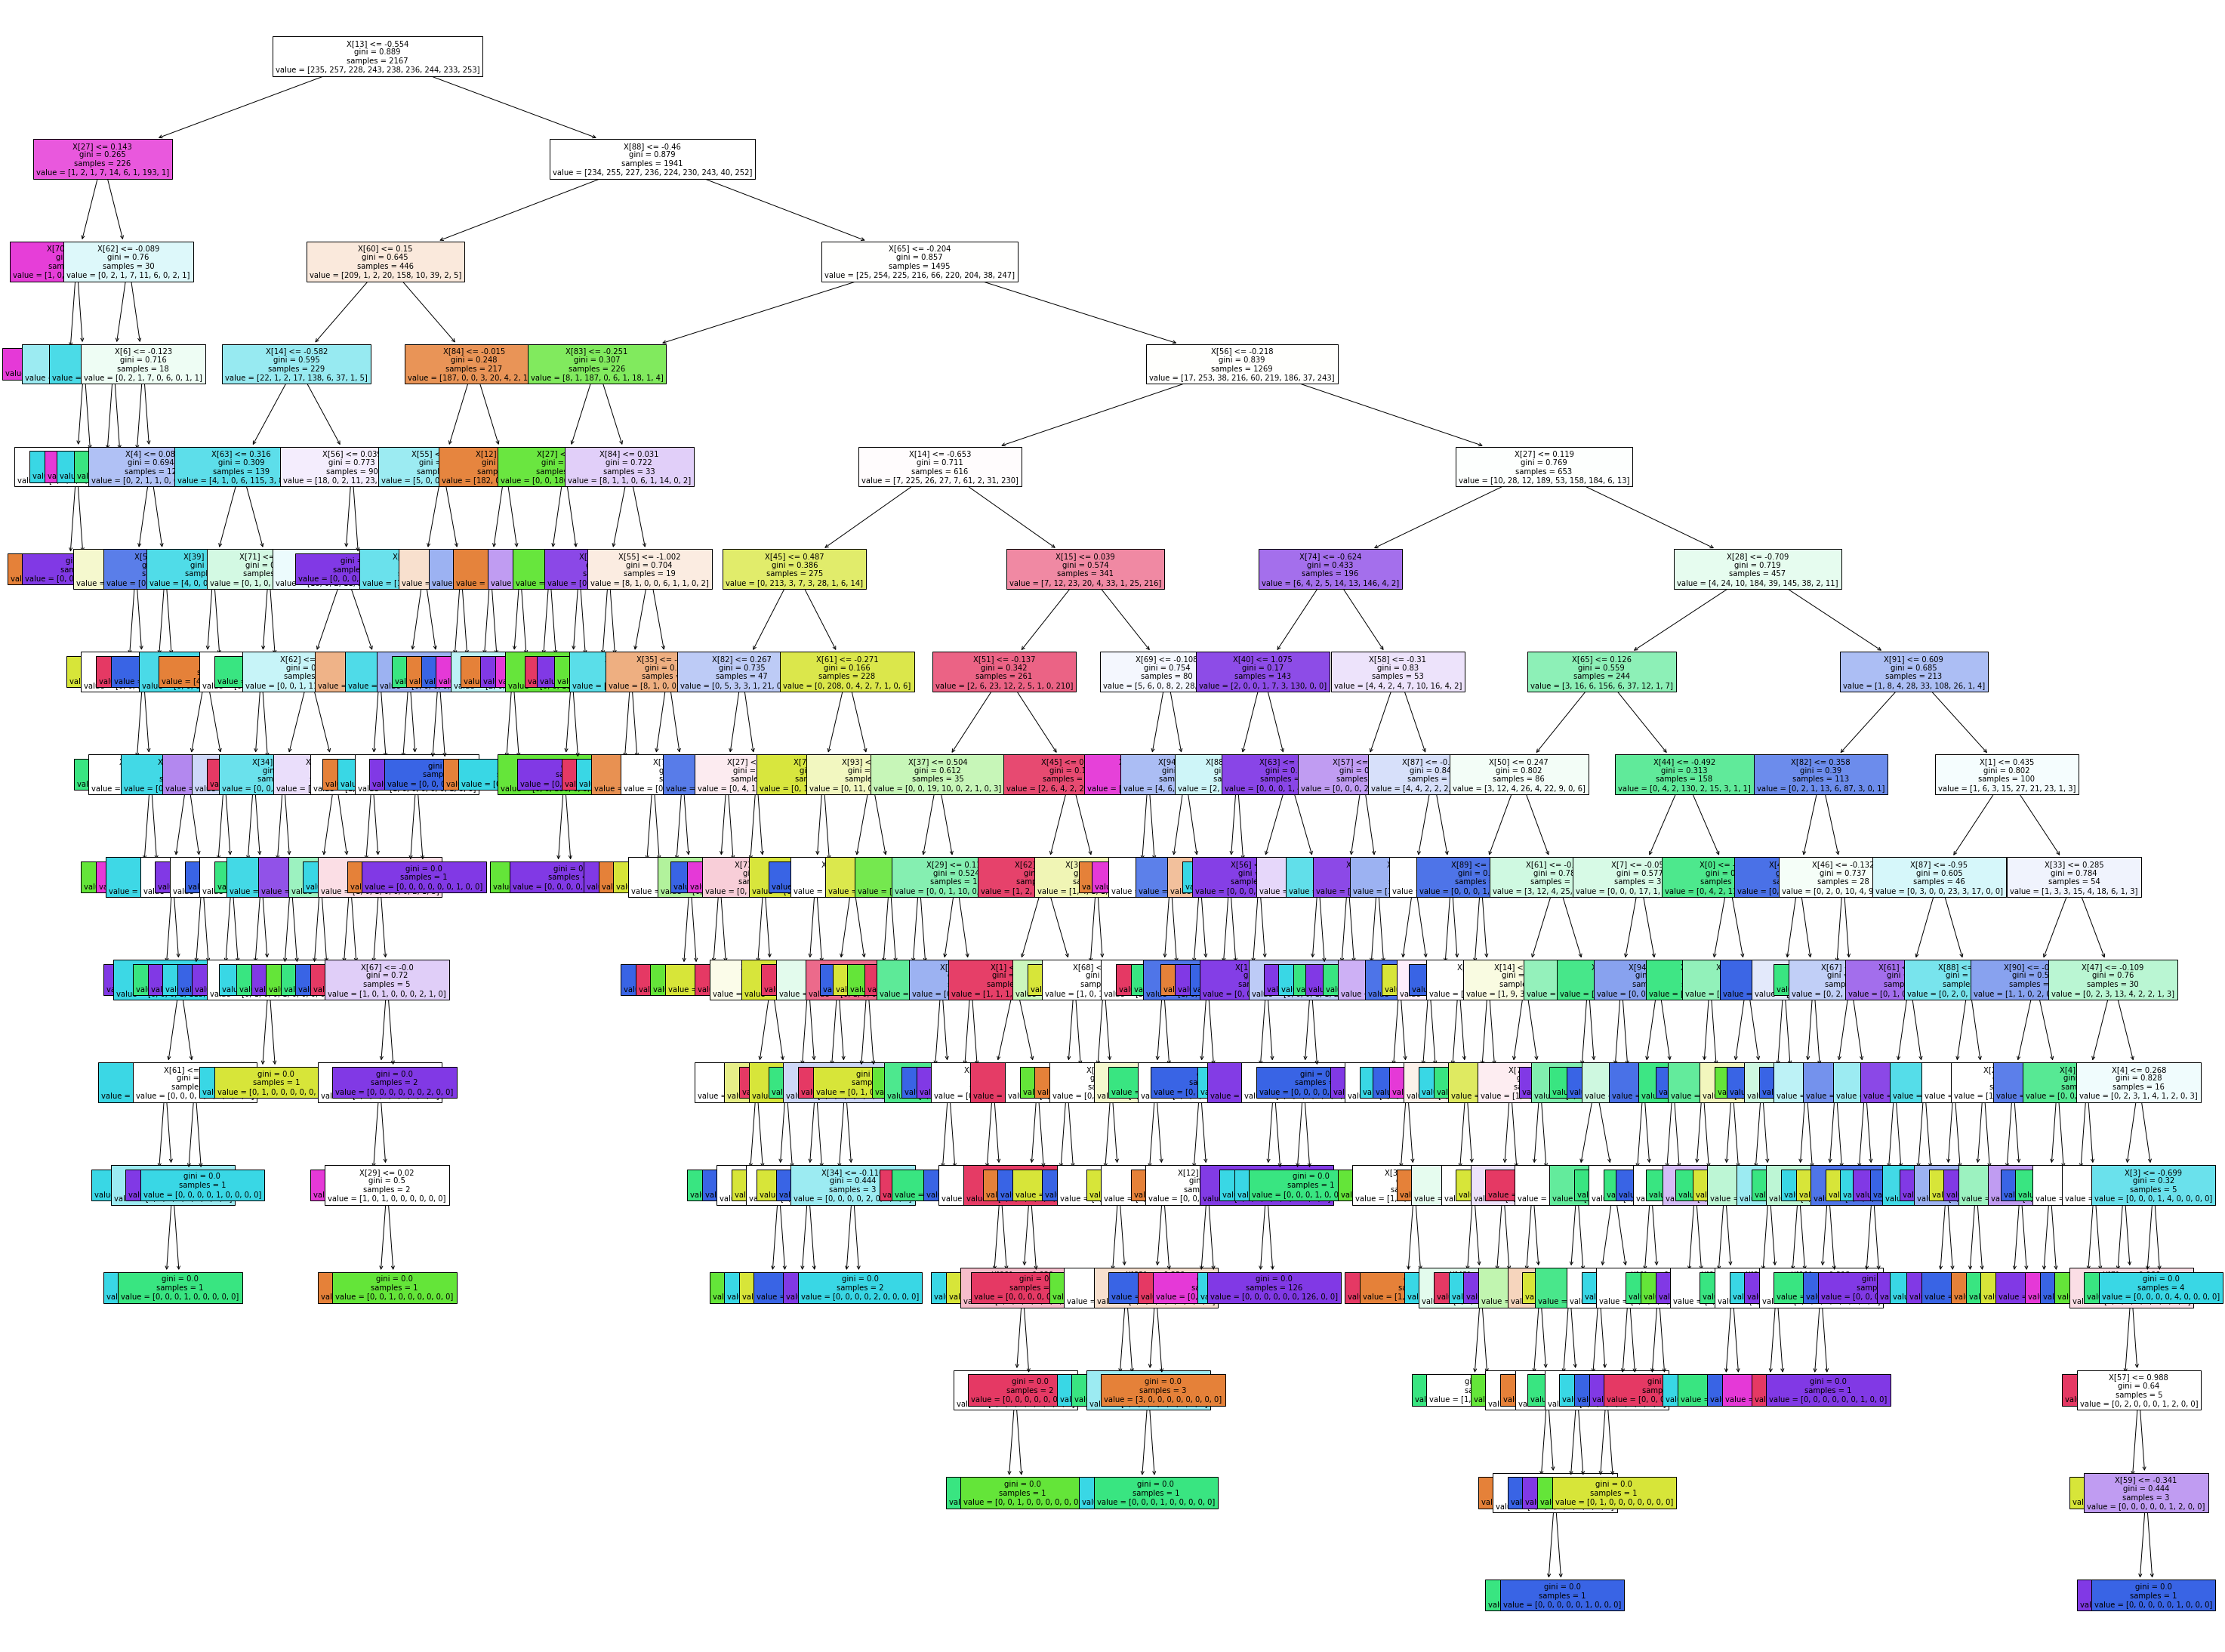

In [40]:
# display the tree for version 1
fig, axes = plt.subplots(figsize = (50,40))
tree.plot_tree(dt1, filled=True, fontsize=10)
#plt.show()
plt.savefig('treeV1.png')

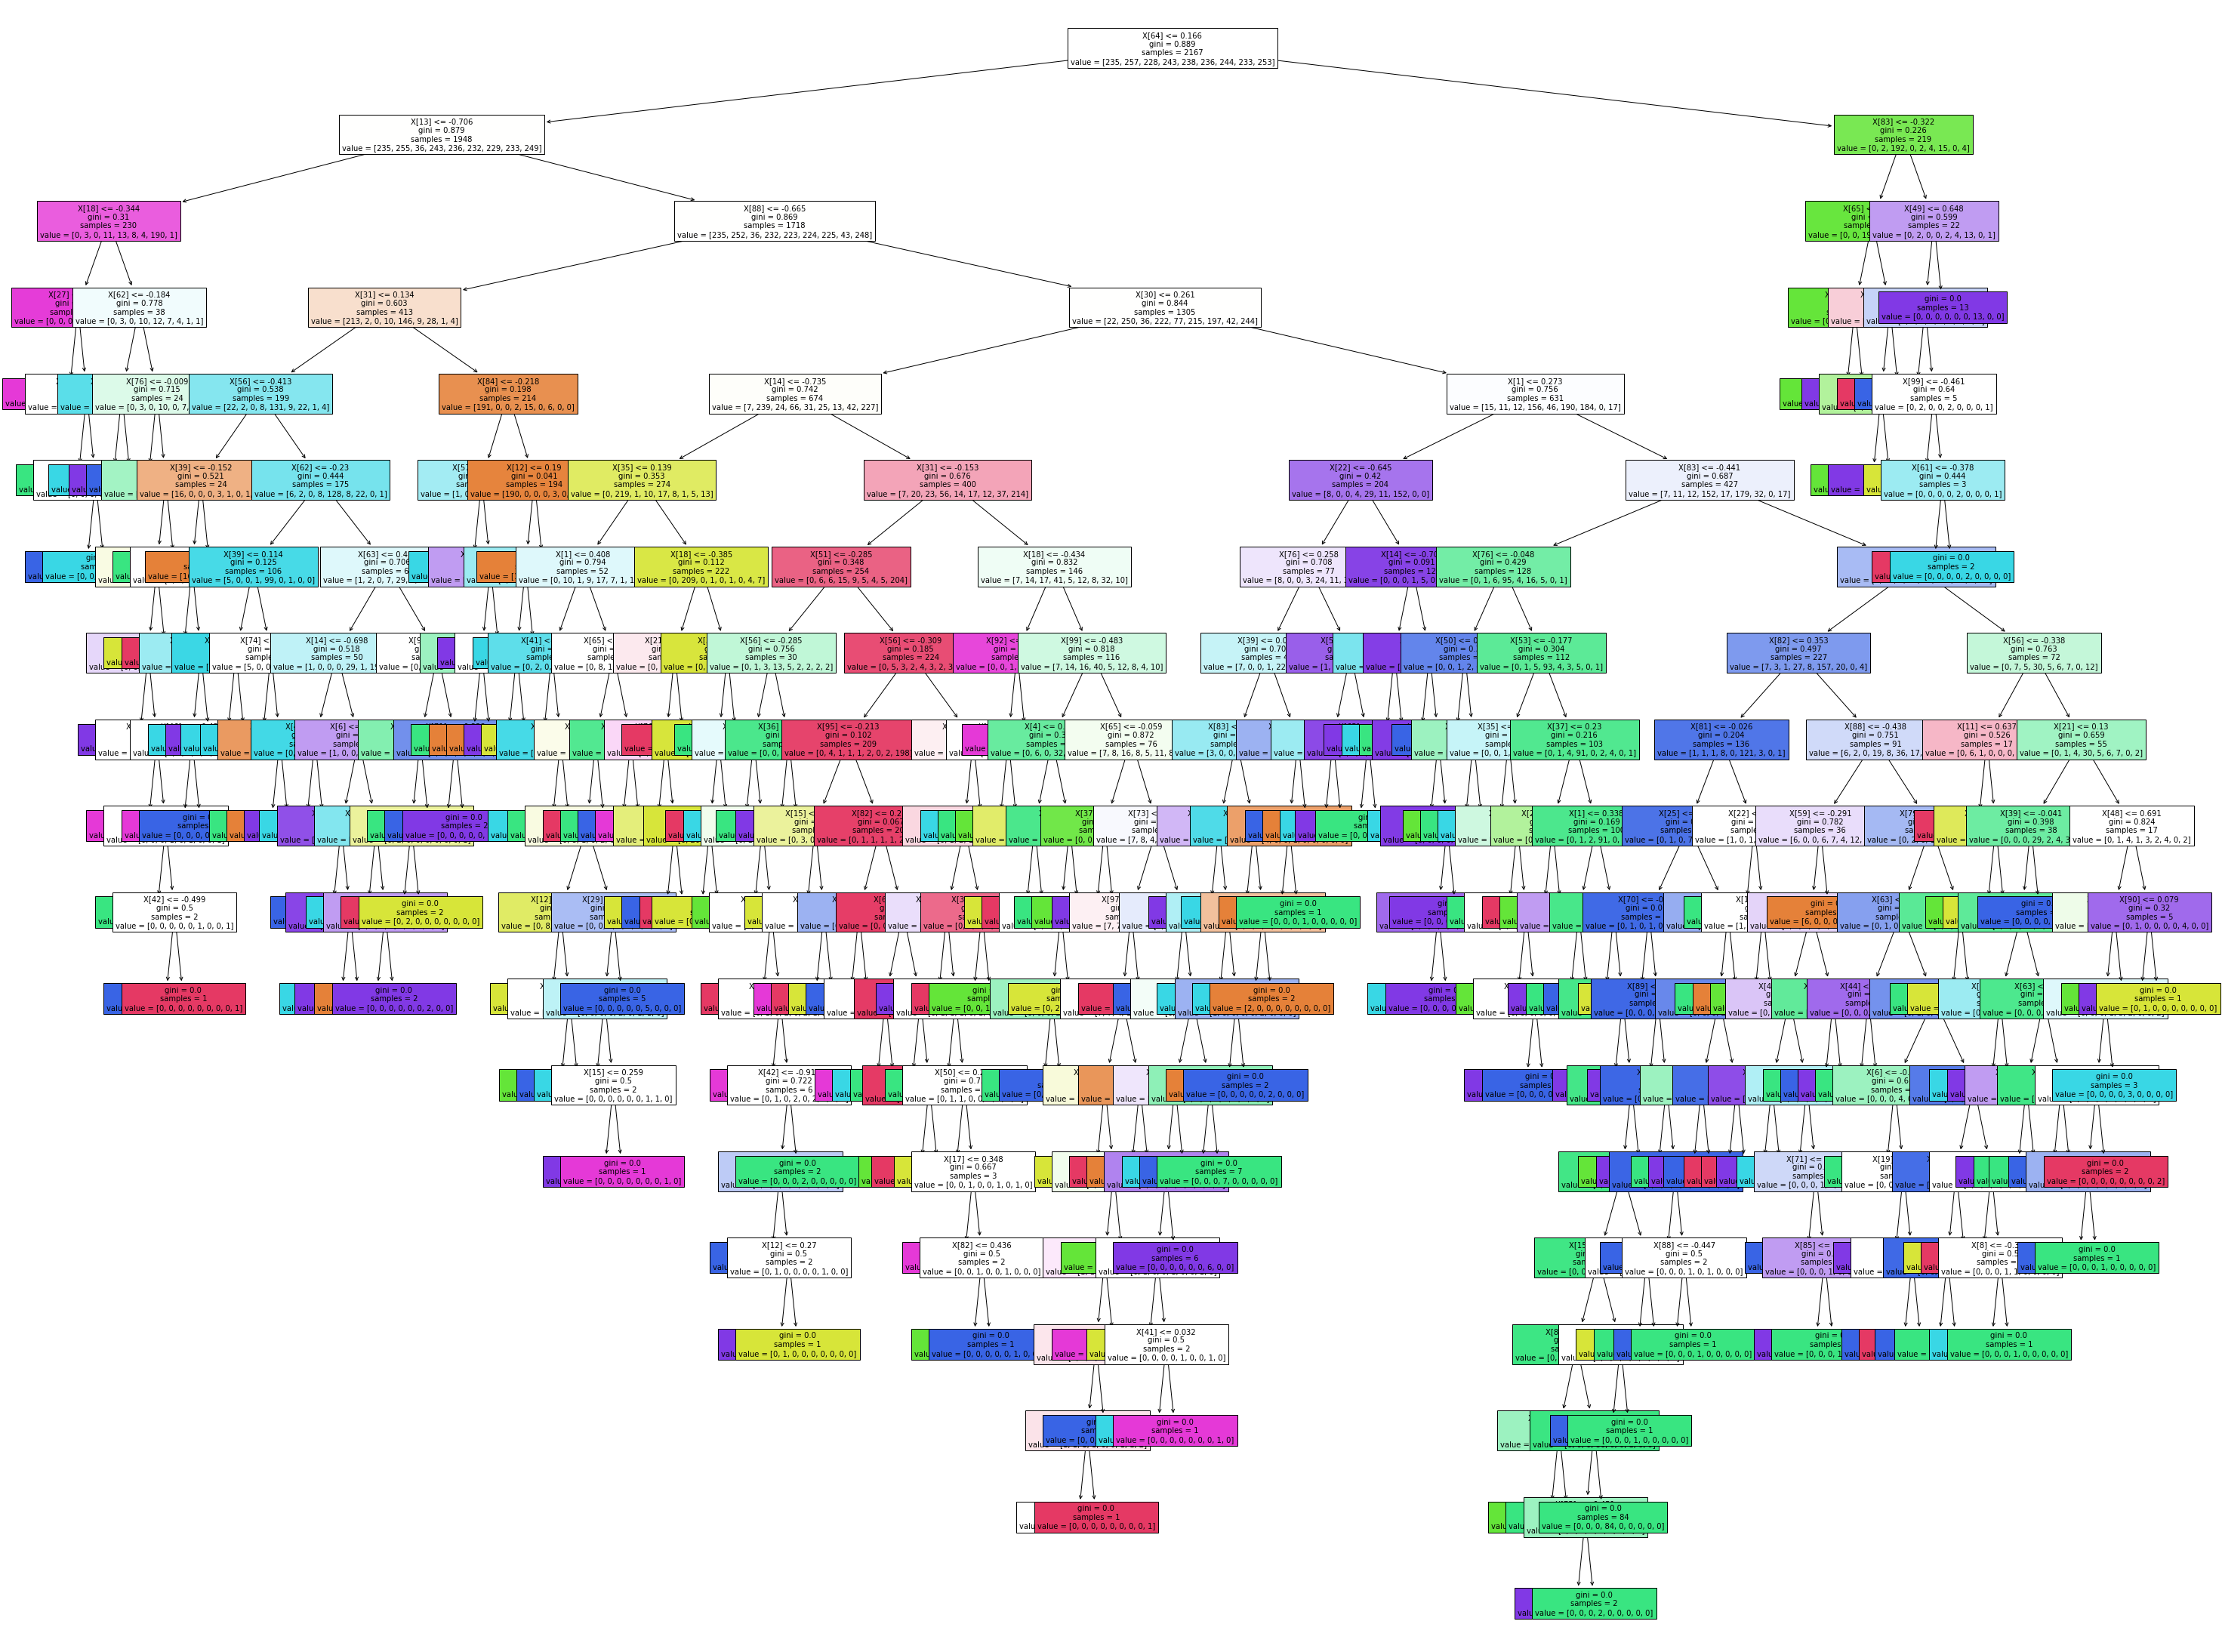

In [41]:
# display the tree for version 2
fig, axes = plt.subplots(figsize = (50,40))
tree.plot_tree(dt2, filled=True, fontsize=10)
#plt.show()
plt.savefig('treeV2.png')

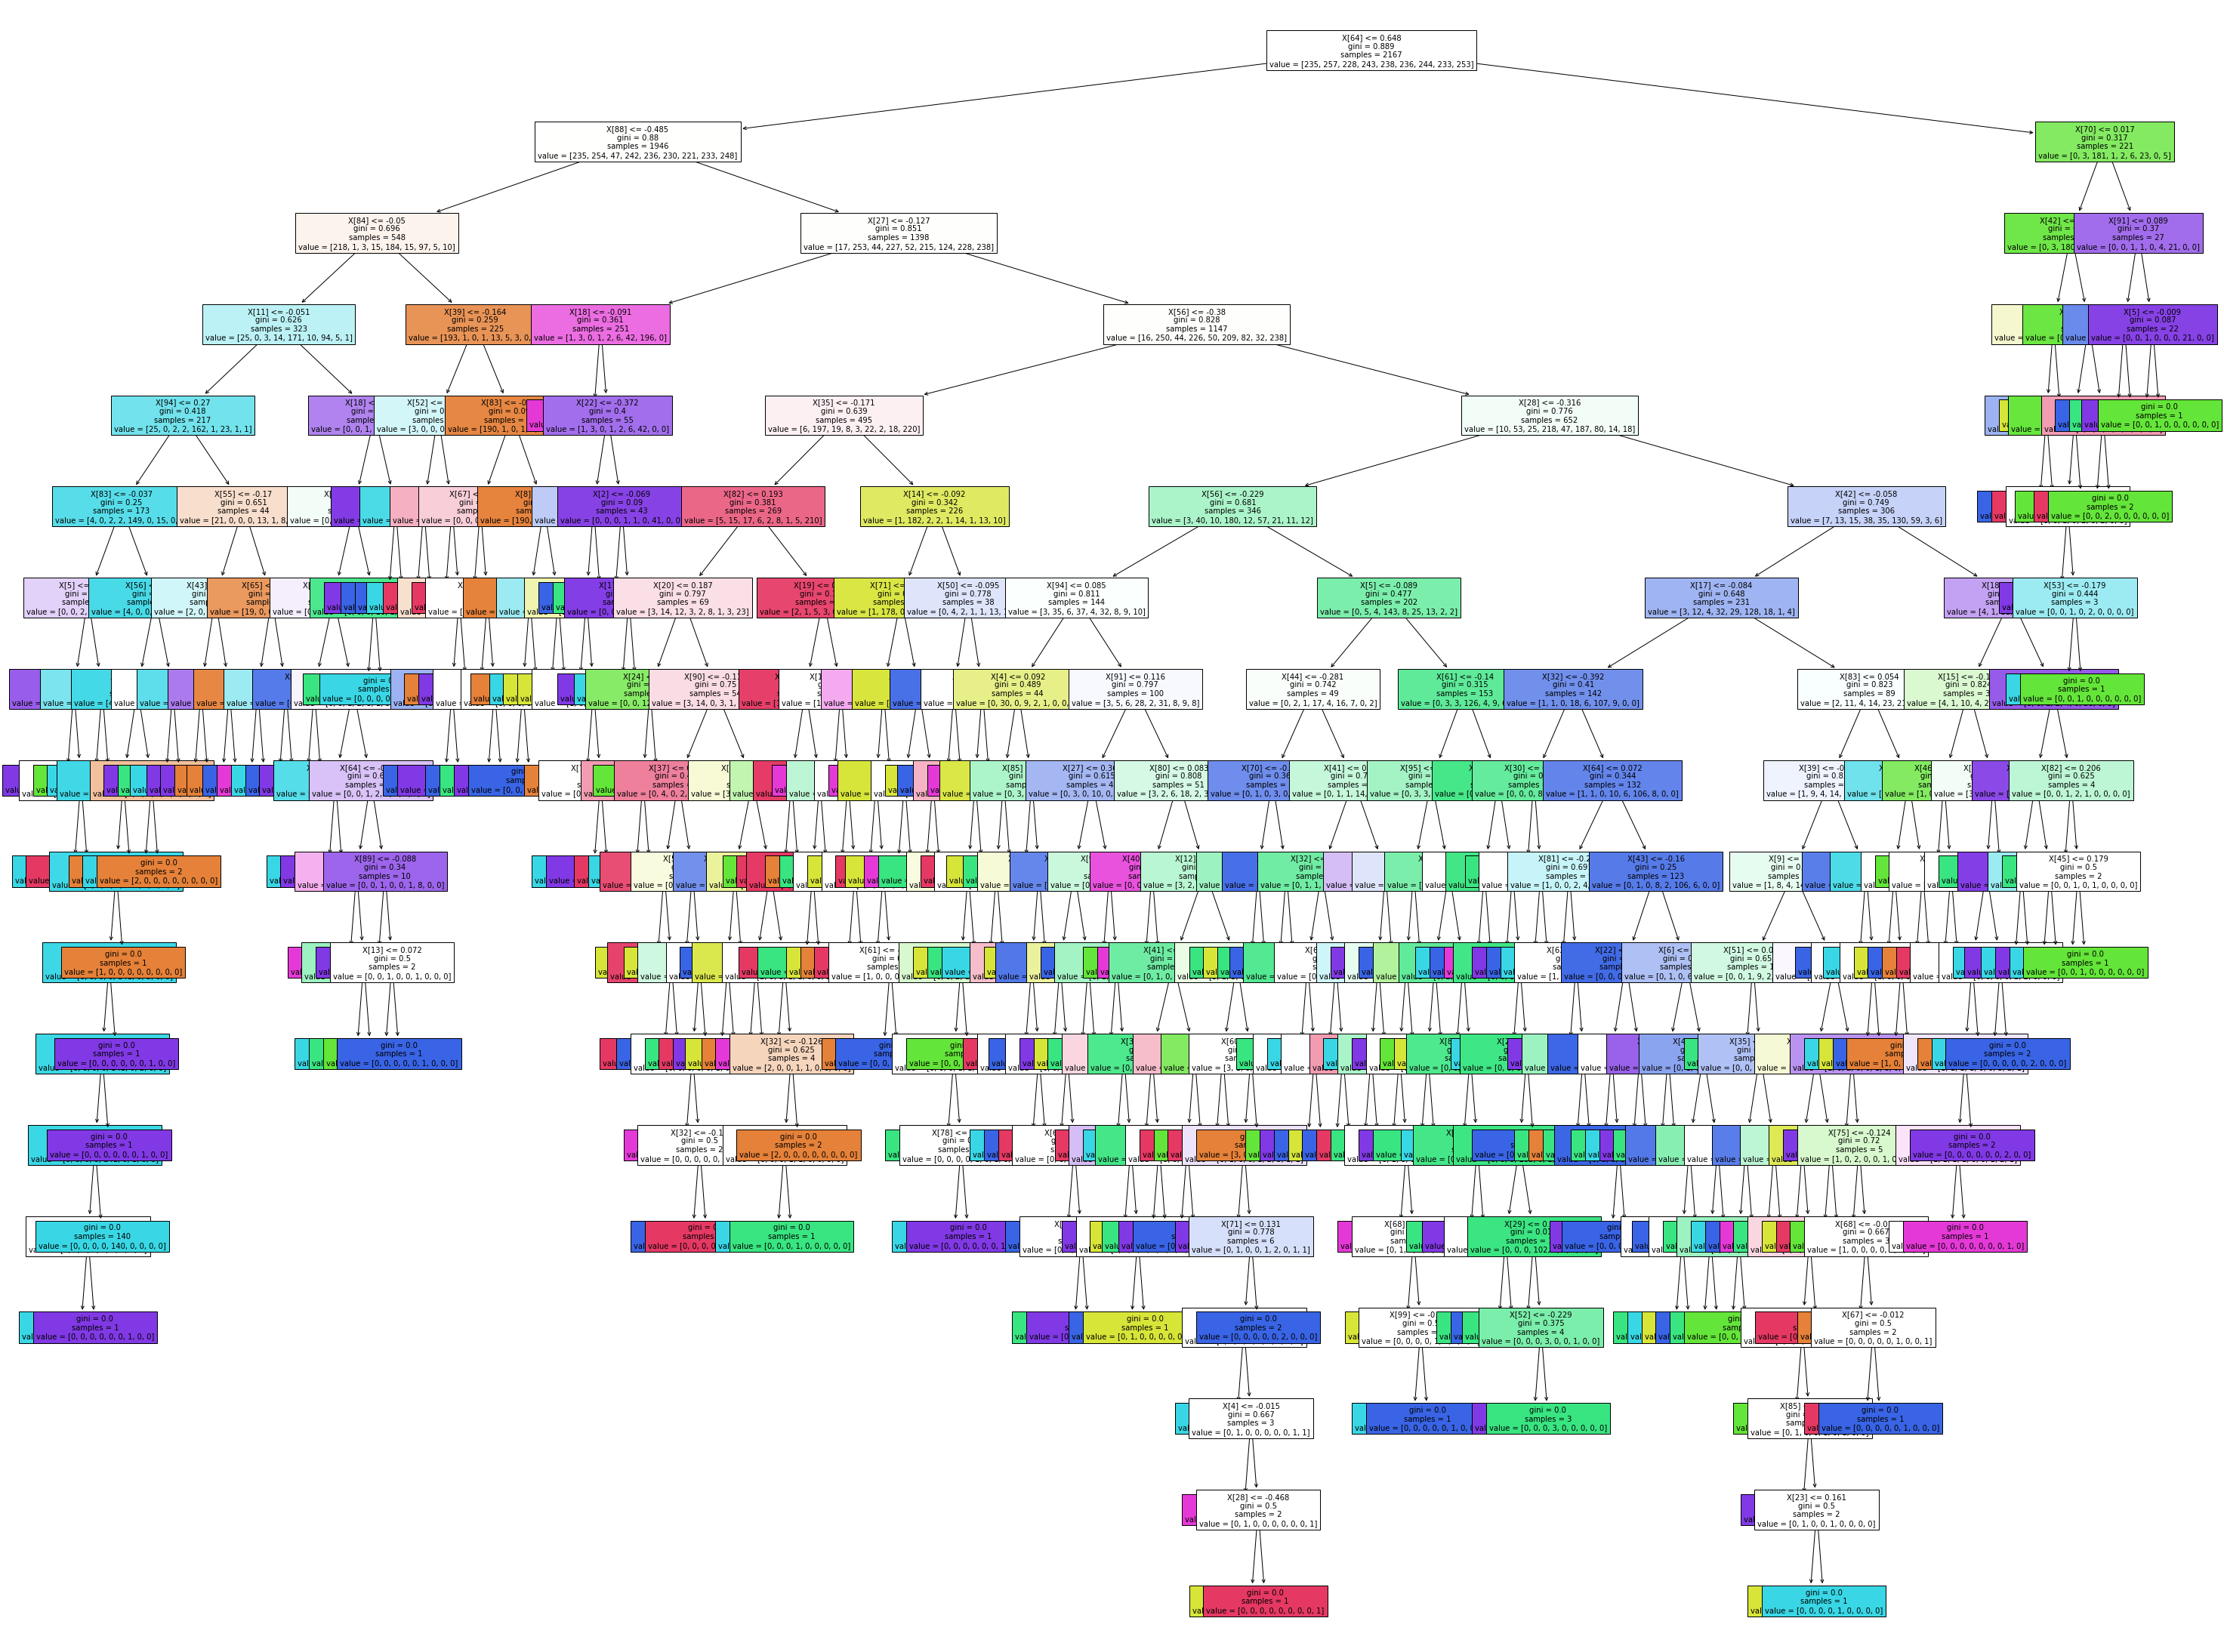

In [42]:
# display the tree for version 3
fig, axes = plt.subplots(figsize = (50,40))
tree.plot_tree(dt3, filled=True, fontsize=10)
#plt.show()
plt.savefig('treeV3.png')

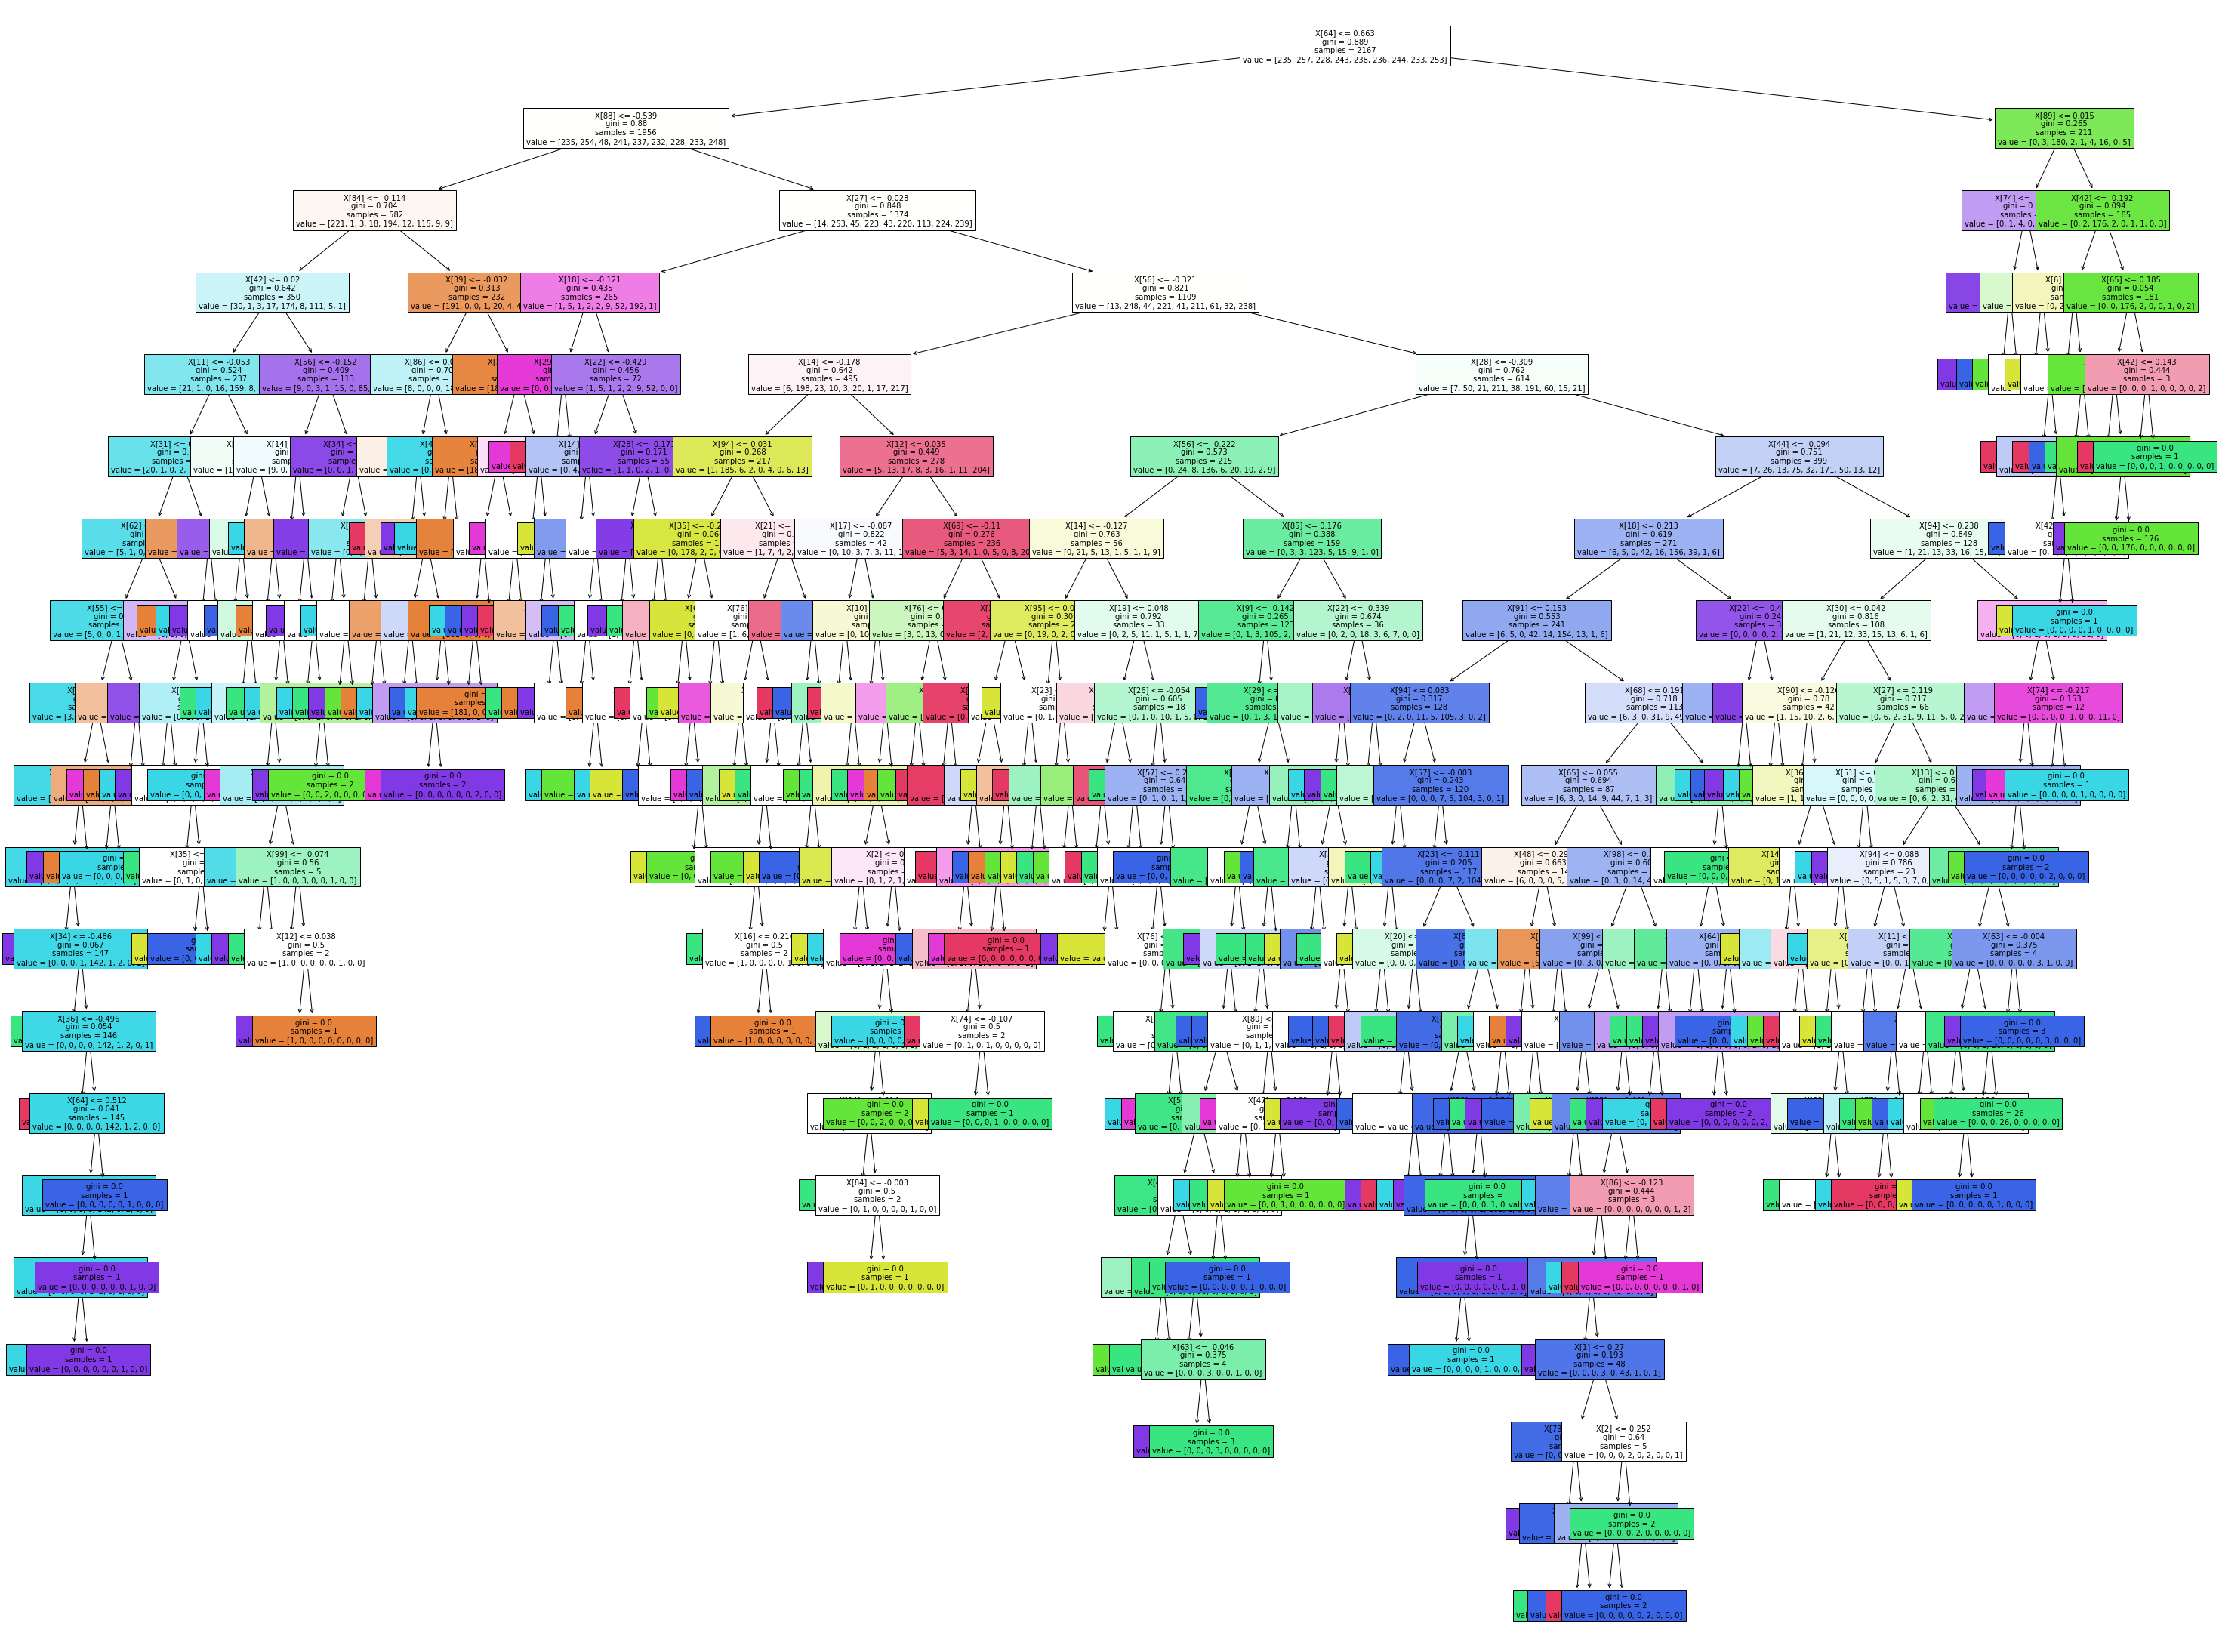

In [43]:
# display the tree for version 4
fig, axes = plt.subplots(figsize = (50,40))
tree.plot_tree(dt4, filled=True, fontsize=10)
#plt.show()
plt.savefig('treeV4.png')

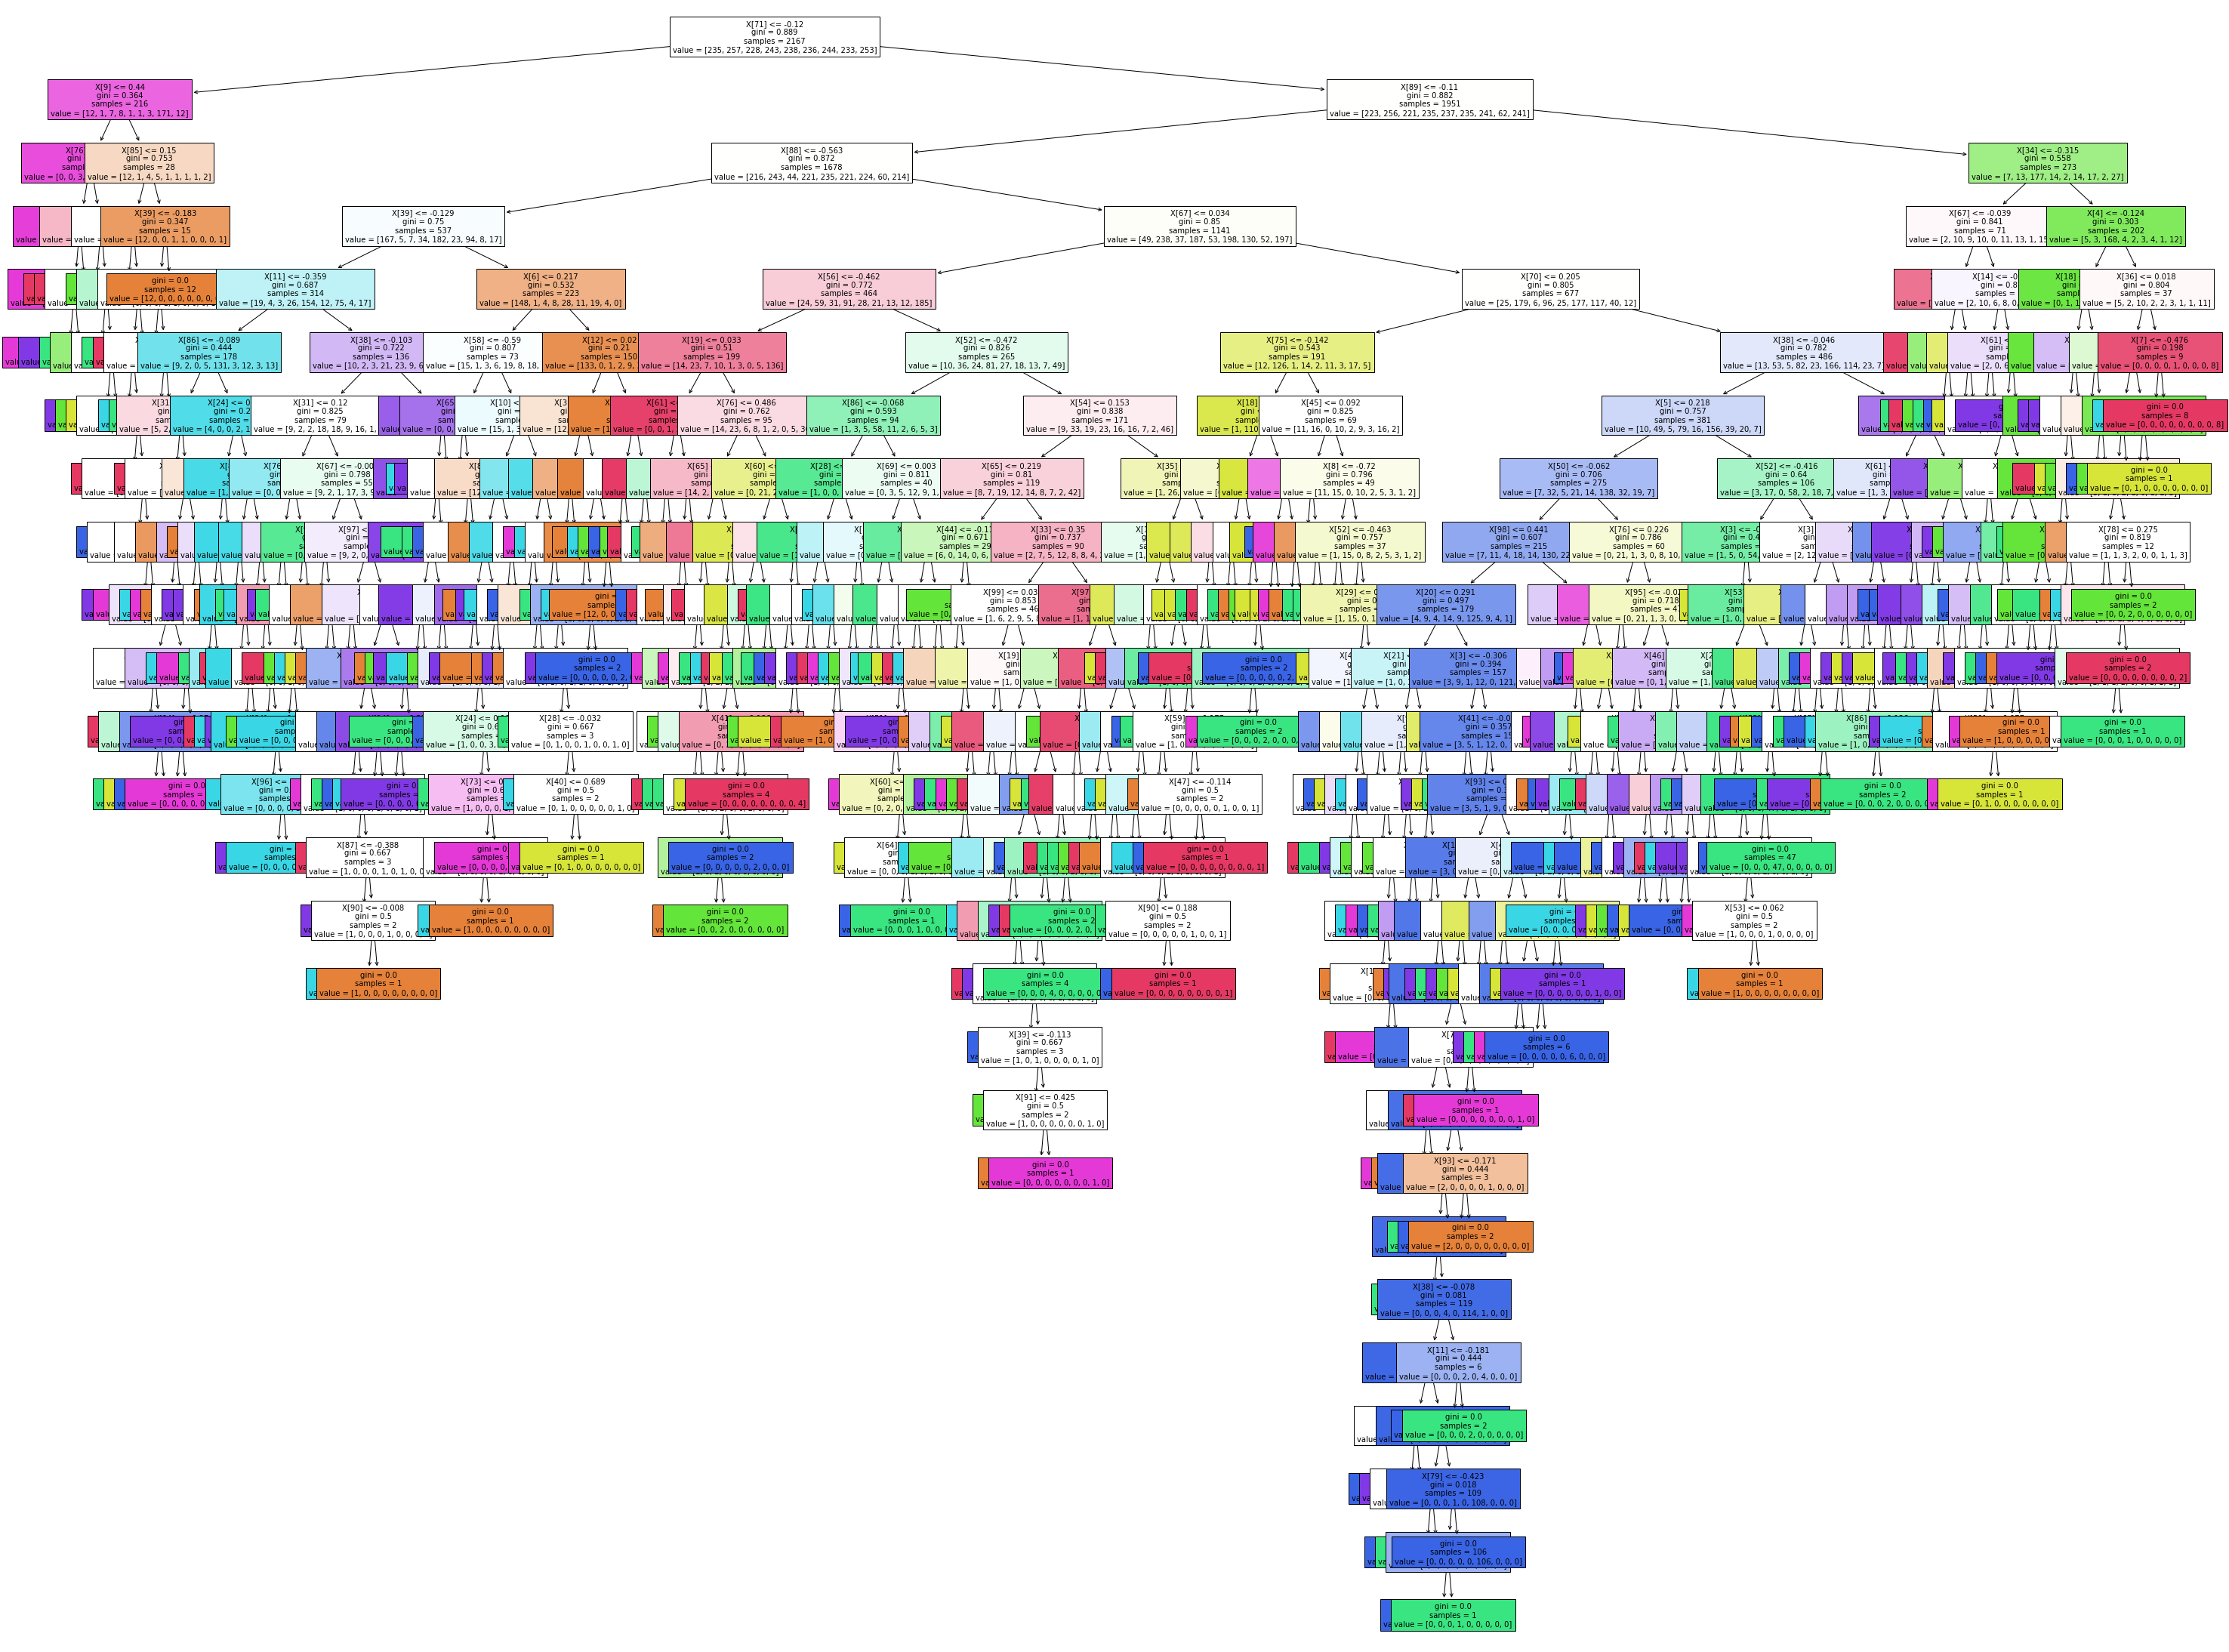

In [44]:
# display the tree for version 5
fig, axes = plt.subplots(figsize = (50,40))
tree.plot_tree(dt5, filled=True, fontsize=10)
#plt.show()
plt.savefig('treeV5.png')

### 6- Evaluation 

In [45]:
print(' The confusion matrix for version 1 data using support victor machine')
print(classification_report(y_test1,prediction["svm1"]))

print(' The confusion matrix for version 2 data using support victor machine')
print(classification_report(y_test2,prediction["svm1"]))

print(' The confusion matrix for version 3 data using support victor machine')
print(classification_report(y_test3,prediction["svm1"]))

print(' The confusion matrix for version 4 data using support victor machine')
print(classification_report(y_test4,prediction["svm1"]))

print(' The confusion matrix for version 5 data using support victor machine')
print(classification_report(y_test5,prediction["svm1"]))

 The confusion matrix for version 1 data using support victor machine
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.93      0.93      0.93        44
           2       0.97      1.00      0.99        73
           3       0.86      0.95      0.90        58
           4       0.96      0.84      0.90        63
           5       0.91      0.92      0.92        65
           6       0.98      0.93      0.95        57
           7       1.00      1.00      1.00        68
           8       0.92      0.96      0.94        48

    accuracy                           0.95       542
   macro avg       0.95      0.94      0.94       542
weighted avg       0.95      0.95      0.95       542

 The confusion matrix for version 2 data using support victor machine
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.93      0.93      0.93   

In [46]:
print(' The confusion matrix for version 1 data using Naive bayes')
print(classification_report(y_test1,prediction["nb1"]))

print(' The confusion matrix for version 2 data using Naive bayes')
print(classification_report(y_test2,prediction["nb2"]))

print(' The confusion matrix for version 3 data using Naive bayes')
print(classification_report(y_test3,prediction["nb3"]))

print(' The confusion matrix for version 4 data using Naive bayes')
print(classification_report(y_test4,prediction["nb4"]))

print(' The confusion matrix for version 5 data using Naive bayes')
print(classification_report(y_test5,prediction["nb5"]))

 The confusion matrix for version 1 data using Naive bayes
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.93      0.86      0.89        44
           2       0.99      1.00      0.99        73
           3       0.73      0.79      0.76        58
           4       0.88      0.73      0.80        63
           5       0.80      0.91      0.85        65
           6       0.78      0.79      0.78        57
           7       1.00      0.96      0.98        68
           8       0.90      0.98      0.94        48

    accuracy                           0.89       542
   macro avg       0.89      0.88      0.88       542
weighted avg       0.89      0.89      0.89       542

 The confusion matrix for version 2 data using Naive bayes
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        66
           1       0.95      0.86      0.90        44
           2  

In [47]:
print(' The confusion matrix for version 1 data using Decision Tree')
print(classification_report(y_test1,prediction["dt1"]))

print(' The confusion matrix for version 2 data using Decision Tree')
print(classification_report(y_test2,prediction["dt2"]))

print(' The confusion matrix for version 3 data using Decision Tree')
print(classification_report(y_test3,prediction["dt3"]))

print(' The confusion matrix for version 4 data using Decision Tree')
print(classification_report(y_test4,prediction["dt4"]))

print(' The confusion matrix for version 5 data using Decision Tree')
print(classification_report(y_test5,prediction["dt5"]))

 The confusion matrix for version 1 data using Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        66
           1       0.81      0.77      0.79        44
           2       0.91      0.92      0.91        73
           3       0.63      0.64      0.63        58
           4       0.68      0.62      0.65        63
           5       0.75      0.65      0.69        65
           6       0.58      0.65      0.61        57
           7       0.87      0.88      0.88        68
           8       0.78      0.88      0.82        48

    accuracy                           0.77       542
   macro avg       0.76      0.76      0.76       542
weighted avg       0.77      0.77      0.76       542

 The confusion matrix for version 2 data using Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.82      0.84      0.83        44
          